In [34]:
import tensorflow as tf

from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Embedding, LSTM, Dense, Bidirectional
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
import numpy as np 


In [1]:

from google.colab import files
uploaded = files.upload()

Saving RapGOd.txt to RapGOd.txt


In [35]:
files.download('RapGOd.txt')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [36]:


data = open("/content/RapGOd.txt").read()

In [37]:
tokenizer = Tokenizer()

In [38]:
#To create Python List of sentences and convert them into lower cases

corpus = data.lower().split("\\n")

In [39]:
corpus

['look, i was gonna go easy on you and not to hurt your feelings ',
 "\nbut i'm only going to get this one chance ",
 "\nsomething's wrong, i can feel it (six minutes, slim shady, you're on) ",
 "\njust a feeling i've got, like something's about to happen, but i don't know what ",
 "\nif that means, what i think it means, we're in trouble, big trouble, ",
 "\nand if he is as bananas as you say, i'm not taking any chances ",
 '\nyou were just what the doctor ordered ',
 "\ni'm beginning to feel like a rap god, rap god ",
 '\nall my people from the front to the back nod, back nod ',
 '\nnow who thinks their arms are long enough to slap box, slap box? ',
 '\nthey said i rap like a robot, so call me rapbot ',
 '\nbut for me to rap like a computer must be in my genes ',
 '\ni got a laptop in my back pocket ',
 "\nmy pen'll go off when i half-cock it ",
 '\ngot a fat knot from that rap profit ',
 '\nmade a living and a killing off it ',
 '\never since bill clinton was still in office ',
 '\n

In [40]:
#To create a dictionary of words
#key: words | values: token of that word

tokenizer.fit_on_texts(corpus) 

In [41]:
total_words = len(tokenizer.word_index)+1

In [42]:
# TOtal number of words in RapGOd

total_words

1018

In [43]:
tokenizer.word_index

{'the': 1,
 'i': 2,
 'to': 3,
 'a': 4,
 'you': 5,
 'and': 6,
 "i'm": 7,
 'but': 8,
 'in': 9,
 'it': 10,
 'my': 11,
 'me': 12,
 'of': 13,
 'this': 14,
 'be': 15,
 'that': 16,
 "it's": 17,
 'on': 18,
 'like': 19,
 'so': 20,
 'for': 21,
 'he': 22,
 'back': 23,
 "don't": 24,
 'get': 25,
 'what': 26,
 'all': 27,
 'from': 28,
 'is': 29,
 'was': 30,
 'go': 31,
 'if': 32,
 'with': 33,
 "'cause": 34,
 'out': 35,
 'not': 36,
 'as': 37,
 'say': 38,
 'up': 39,
 'oh': 40,
 "he's": 41,
 'your': 42,
 'just': 43,
 'know': 44,
 'rap': 45,
 'they': 46,
 'when': 47,
 'got': 48,
 'do': 49,
 'take': 50,
 'one': 51,
 'can': 52,
 'now': 53,
 'no': 54,
 'make': 55,
 'feel': 56,
 'still': 57,
 'his': 58,
 'these': 59,
 'looking': 60,
 'boy': 61,
 'are': 62,
 'said': 63,
 'fuck': 64,
 'or': 65,
 'only': 66,
 'were': 67,
 'god': 68,
 'off': 69,
 "i'll": 70,
 'how': 71,
 'way': 72,
 'never': 73,
 'through': 74,
 'think': 75,
 'let': 76,
 'come': 77,
 'down': 78,
 "you're": 79,
 'at': 80,
 'have': 81,
 'we': 82,
 

__Training the data__


In [44]:
input_sequences = []

In [45]:
for line in corpus:
    token_list = tokenizer.texts_to_sequences([line])[0]  #generating token for each line in corpus
    
    for i in range(1, len(token_list)):
        
        n_gram_sequence = token_list[:i+1]
        
        # N-grams are simply all combinations of adjacent words or letters of length n that you can find in your source text.
        
        input_sequences.append(n_gram_sequence)

In [46]:
input_sequences


[[118, 2],
 [118, 2, 30],
 [118, 2, 30, 211],
 [118, 2, 30, 211, 31],
 [118, 2, 30, 211, 31, 212],
 [118, 2, 30, 211, 31, 212, 18],
 [118, 2, 30, 211, 31, 212, 18, 5],
 [118, 2, 30, 211, 31, 212, 18, 5, 6],
 [118, 2, 30, 211, 31, 212, 18, 5, 6, 36],
 [118, 2, 30, 211, 31, 212, 18, 5, 6, 36, 3],
 [118, 2, 30, 211, 31, 212, 18, 5, 6, 36, 3, 332],
 [118, 2, 30, 211, 31, 212, 18, 5, 6, 36, 3, 332, 42],
 [118, 2, 30, 211, 31, 212, 18, 5, 6, 36, 3, 332, 42, 213],
 [8, 7],
 [8, 7, 66],
 [8, 7, 66, 333],
 [8, 7, 66, 333, 3],
 [8, 7, 66, 333, 3, 25],
 [8, 7, 66, 333, 3, 25, 14],
 [8, 7, 66, 333, 3, 25, 14, 51],
 [8, 7, 66, 333, 3, 25, 14, 51, 151],
 [214, 334],
 [214, 334, 2],
 [214, 334, 2, 52],
 [214, 334, 2, 52, 56],
 [214, 334, 2, 52, 56, 10],
 [214, 334, 2, 52, 56, 10, 335],
 [214, 334, 2, 52, 56, 10, 335, 336],
 [214, 334, 2, 52, 56, 10, 335, 336, 215],
 [214, 334, 2, 52, 56, 10, 335, 336, 215, 337],
 [214, 334, 2, 52, 56, 10, 335, 336, 215, 337, 79],
 [214, 334, 2, 52, 56, 10, 335, 336, 

In [47]:
#Find the length of longest sentence in corpus

max_sequence_length = max([len(x) for x in input_sequences])

In [48]:
#Length of longest Sentence

max_sequence_length

19

In [49]:
#Pad all the sequence of length of the longest sentence to make them all equal
#We are using Pre padding here

input_sequences = np.array(pad_sequences(input_sequences, maxlen=max_sequence_length, padding='pre'))


In [50]:
input_sequences

array([[  0,   0,   0, ...,   0, 118,   2],
       [  0,   0,   0, ..., 118,   2,  30],
       [  0,   0,   0, ...,   2,  30, 211],
       ...,
       [  0,   0,   0, ...,  47,   2, 205],
       [  0,   0,   0, ...,   2, 205, 322],
       [  0,   0,   0, ..., 205, 322,   5]], dtype=int32)

In [51]:
input_sequences.shape

(2926, 19)

In [52]:
#Seperating padded sentences in Xs and Ys(label)
#All the last characters are yS nd remaining are Xs of each line

xs = input_sequences[:,:-1]        #All the characters except the last character
labels = input_sequences[:,-1]  #Extracting the last charater

In [53]:
#Since it is a classification problem We have to ONE HOT ENCODE the Labels
#and then put it in ys
#.tocategorical will create onehotencoding of labels\

ys = tf.keras.utils.to_categorical(labels, num_classes=total_words)


In [54]:
ys.shape

#Number Different Words in Song = Number of rows

(2926, 1018)

#Sentence

print(tokenizer.word_index['look'])
print(tokenizer.word_index['i'])
print(tokenizer.word_index['was'])
print(tokenizer.word_index['gonna'])
print(tokenizer.word_index['go'])
print(tokenizer.word_index['easy'])
print(tokenizer.word_index['on'])
print(tokenizer.word_index['you'])

# Sentence : [101 2 31 102 75 182 28 5]
#here label is 5

#X : [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 
              #0   0   0   0   0   0   0 101   2  31 102  75 182  28]

print(xs[6])

#One hot encoding of label and 1 on position 5

print(ys[6])

print(xs[5])
print(ys[5]) #one on pos 28

In [55]:
print(tokenizer.word_index)

{'the': 1, 'i': 2, 'to': 3, 'a': 4, 'you': 5, 'and': 6, "i'm": 7, 'but': 8, 'in': 9, 'it': 10, 'my': 11, 'me': 12, 'of': 13, 'this': 14, 'be': 15, 'that': 16, "it's": 17, 'on': 18, 'like': 19, 'so': 20, 'for': 21, 'he': 22, 'back': 23, "don't": 24, 'get': 25, 'what': 26, 'all': 27, 'from': 28, 'is': 29, 'was': 30, 'go': 31, 'if': 32, 'with': 33, "'cause": 34, 'out': 35, 'not': 36, 'as': 37, 'say': 38, 'up': 39, 'oh': 40, "he's": 41, 'your': 42, 'just': 43, 'know': 44, 'rap': 45, 'they': 46, 'when': 47, 'got': 48, 'do': 49, 'take': 50, 'one': 51, 'can': 52, 'now': 53, 'no': 54, 'make': 55, 'feel': 56, 'still': 57, 'his': 58, 'these': 59, 'looking': 60, 'boy': 61, 'are': 62, 'said': 63, 'fuck': 64, 'or': 65, 'only': 66, 'were': 67, 'god': 68, 'off': 69, "i'll": 70, 'how': 71, 'way': 72, 'never': 73, 'through': 74, 'think': 75, 'let': 76, 'come': 77, 'down': 78, "you're": 79, 'at': 80, 'have': 81, 'we': 82, 'goes': 83, 'better': 84, 'da': 85, 'love': 86, 'nod': 87, 'enough': 88, "'em": 89

__Model__


In [56]:
model = Sequential()
model.add(Embedding(total_words, 100, input_length=max_sequence_length-1))
model.add(Bidirectional(LSTM(150)))
model.add(Dense(total_words, activation='softmax'))

#Softmax because of categorical nature 

In [57]:
adam = Adam(lr = 0.01)
model.compile(loss='categorical_crossentropy', optimizer=adam, metrics=['accuracy'])
  

In [58]:
history = model.fit(xs, ys, epochs=100, verbose=1)

Epoch 1/100
92/92 [==============================] - 1s 8ms/step - loss: 6.4058 - accuracy: 0.0325
Epoch 2/100
92/92 [==============================] - 1s 8ms/step - loss: 5.6643 - accuracy: 0.0636
Epoch 3/100
92/92 [==============================] - 1s 7ms/step - loss: 4.8333 - accuracy: 0.1333
Epoch 4/100
92/92 [==============================] - 1s 7ms/step - loss: 3.6891 - accuracy: 0.2348
Epoch 5/100
92/92 [==============================] - 1s 7ms/step - loss: 2.4786 - accuracy: 0.4214
Epoch 6/100
92/92 [==============================] - 1s 7ms/step - loss: 1.4694 - accuracy: 0.6476
Epoch 7/100
92/92 [==============================] - 1s 7ms/step - loss: 0.8676 - accuracy: 0.8028
Epoch 8/100
92/92 [==============================] - 1s 7ms/step - loss: 0.5618 - accuracy: 0.8749
Epoch 9/100
92/92 [==============================] - 1s 7ms/step - loss: 0.4040 - accuracy: 0.9026
Epoch 10/100
92/92 [==============================] - 1s 7ms/step - loss: 0.3460 - accuracy: 0.9125
Epoch 11/

In [59]:
import matplotlib.pyplot as plt


def plot_graphs(history, string):
    plt.plot(history.history[string])
    plt.xlabel("Epochs")
    plt.ylabel(string)
    plt.show()

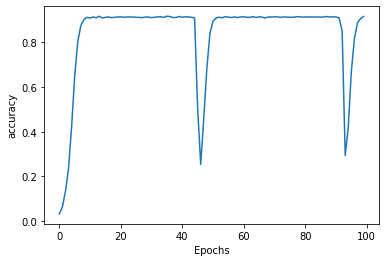

In [60]:
plot_graphs(history, 'accuracy')

In [61]:
seed_text = "harry said i love"
next_words = 100
  
for _ in range(next_words):
    token_list = tokenizer.texts_to_sequences([seed_text])[0]
    token_list = pad_sequences([token_list], maxlen=max_sequence_length-1, padding='pre')
    predicted = model.predict_classes(token_list, verbose=0)
    output_word = ""
    for word, index in tokenizer.word_index.items():
        if index == predicted:
            output_word = word
            break
    seed_text += " " + output_word
print(seed_text)

harry said i love my feeling on the wall of shame and all down on the wall of shame rock n' a doberman him i'm don't dead if when i him dirt bombs i'm practicing him him dirt dirt 'cause i ain't playin' around the track call me how do 'em motivated the rap of the women hate the back then they got to formulate overseas the beginning to feel like i'm a rap god rap profit call you they got slim right now now some i do is drop f bombs feel my wrath my fact go from your label everyday looking boy
